In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
flood_data = pd.read_csv('FloodPrediction.csv')

In [6]:
print(flood_data.head())
print(flood_data.info())
print(flood_data.describe())

   Sl Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
0   0       Barisal  1949      1      29.4      12.3       0.0   
1   1       Barisal  1949      2      33.9      15.2       9.0   
2   2       Barisal  1949      3      36.7      20.2       8.0   
3   3       Barisal  1949      4      33.9      23.9     140.0   
4   4       Barisal  1949      5      35.6      25.0     217.0   

   Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
0               68.0    0.453704             0.6         7.831915   
1               63.0    0.659259             0.9         8.314894   
2               59.0    1.085185             1.5         8.131915   
3               71.0    1.772222             3.9         8.219149   
4               76.0    1.703704             4.1         7.046809   

   Station_Number     X_COR     Y_COR  LATITUDE  LONGITUDE  ALT   Period  \
0           41950  536809.8  510151.9      22.7      90.36    4  1949.01   
1           41950  536809.8  510151.

In [7]:
flood_data_cleaned = flood_data.copy()

In [8]:
print("NaN values in 'Flood?':", flood_data['Flood?'].isna().sum())
flood_data_cleaned = flood_data_cleaned.fillna(0)
print("NaN values in 'Flood?':", flood_data_cleaned['Flood?'].isna().sum())
print("Data shape after cleaning:", flood_data_cleaned.shape)
print("NaN values in 'Flood?' after replacing:", flood_data_cleaned['Flood?'].isna().sum())

NaN values in 'Flood?': 16051
NaN values in 'Flood?': 0
Data shape after cleaning: (20544, 19)
NaN values in 'Flood?' after replacing: 0


In [9]:
flood_data_cleaned.head()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,0.0
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,0.0
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,0.0
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,0.0
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,0.0


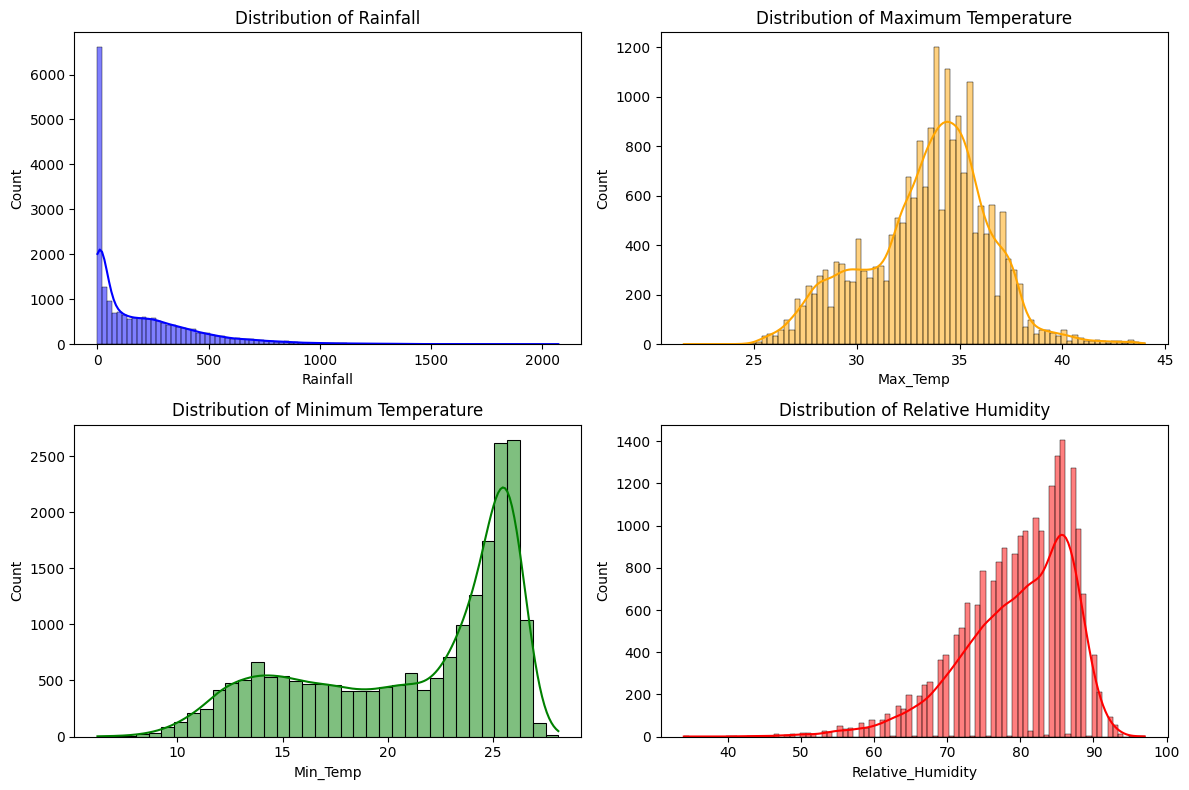

In [10]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(flood_data_cleaned['Rainfall'], kde=True, color='blue')
plt.title('Distribution of Rainfall')

plt.subplot(2, 2, 2)
sns.histplot(flood_data_cleaned['Max_Temp'], kde=True, color='orange')
plt.title('Distribution of Maximum Temperature')

plt.subplot(2, 2, 3)
sns.histplot(flood_data_cleaned['Min_Temp'], kde=True, color='green')
plt.title('Distribution of Minimum Temperature')

plt.subplot(2, 2, 4)
sns.histplot(flood_data_cleaned['Relative_Humidity'], kde=True, color='red')
plt.title('Distribution of Relative Humidity')

plt.tight_layout()
plt.show()

## **Feature** **Engineering**






In [11]:
flood_data_cleaned['Temp_Diff'] = flood_data_cleaned['Max_Temp'] - flood_data_cleaned['Min_Temp']
flood_data_cleaned['Rainfall_Squared'] = flood_data_cleaned['Rainfall'] ** 2

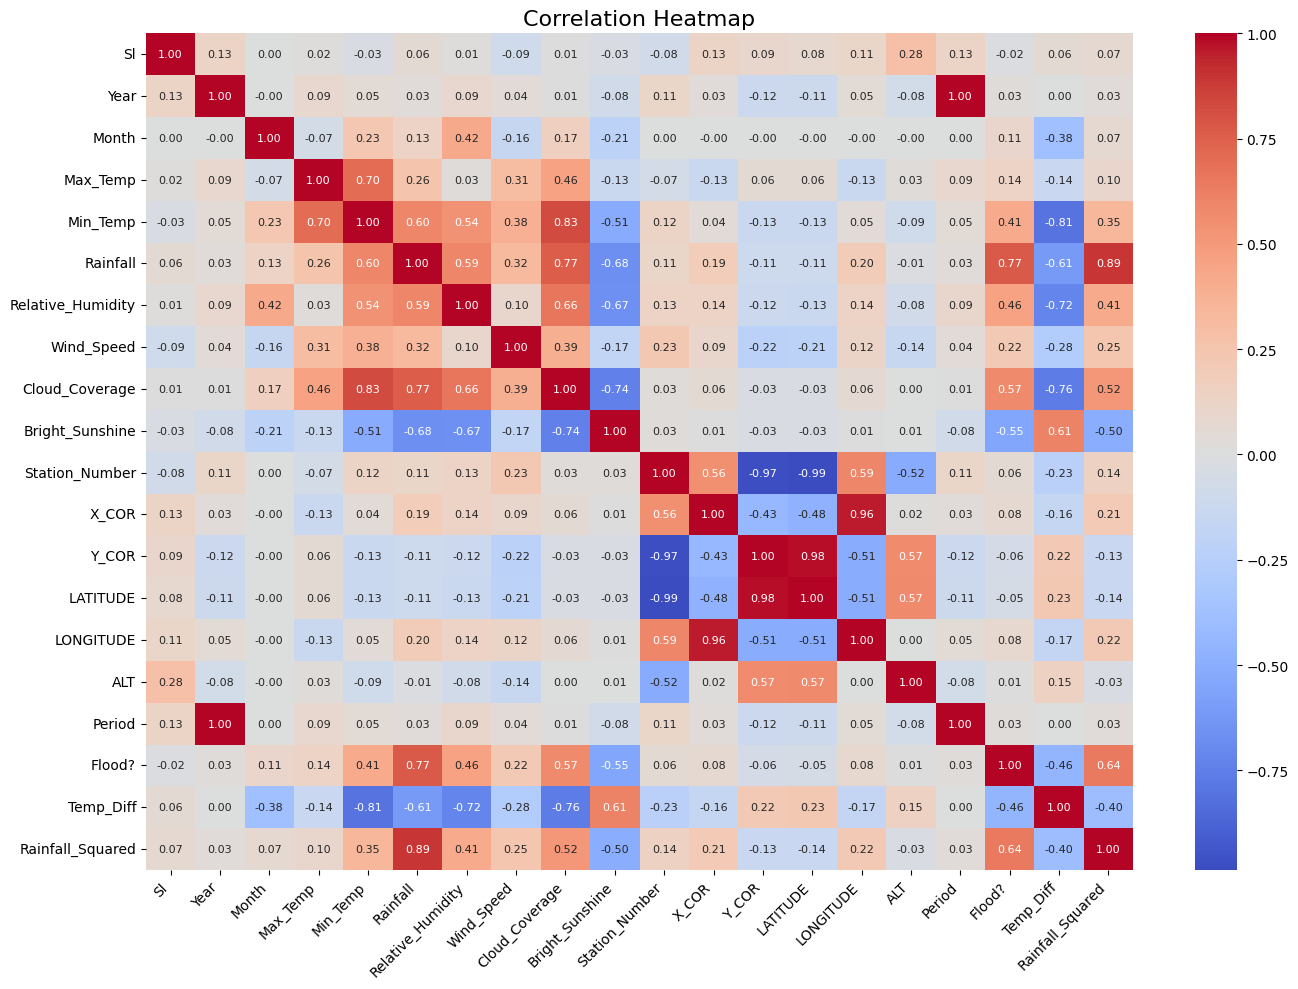

In [12]:

numerical_data = flood_data_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(14, 10))

correlation_matrix = numerical_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
X = flood_data_cleaned[['Max_Temp', 'Min_Temp', 'Rainfall', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine', 'Temp_Diff', 'Rainfall_Squared']]
y = flood_data_cleaned['Flood?']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [16]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"---{model_name}---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred, model_name)

In [17]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

---Logistic Regression---
Accuracy: 0.9406
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      3300
         1.0       0.86      0.83      0.85       809

    accuracy                           0.94      4109
   macro avg       0.91      0.90      0.90      4109
weighted avg       0.94      0.94      0.94      4109



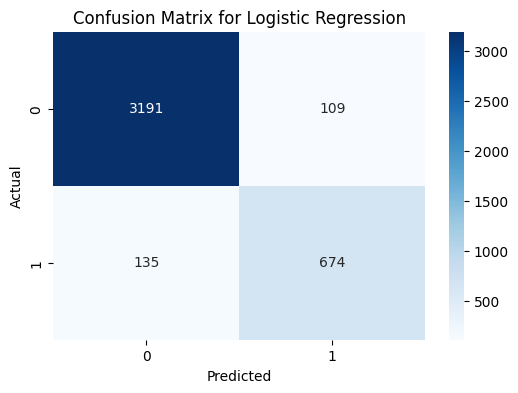

In [18]:
y_pred_logistic = logistic_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_logistic, "Logistic Regression")

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [20]:
print(X_train_scaled.shape)
print(X_train.shape)


(16435, 9)
(16435, 9)


In [21]:
import pandas as pd

# Rename columns if `X_train_scaled` represents entirely new features
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.head()


,0,1,2,3,4,5,6,7,8
0,-0.418228,1.022198,0.328876,0.980890,0.184632,1.067475,-1.177659,-1.759034,-0.092619
1,-0.182240,0.759552,0.416320,0.980890,-0.779628,0.875391,-0.841558,-1.200616,-0.037135
2,-0.418228,0.961587,0.932655,0.719544,-0.490350,1.163516,-1.220691,-1.675271,0.373105
3,0.896561,0.052426,-0.695467,-1.371224,0.473910,-0.373150,0.830741,0.670085,-0.440771
4,-0.283378,0.416091,-0.687139,0.588871,-0.297498,-0.613254,0.899682,-0.809723,-0.440183


In [22]:
# Saving the trained model
import pickle

In [23]:
filename = 'rf_model_forFG.sav'
pickle.dump(rf_model, open(filename, 'wb')) # wb = writing in binary

In [24]:
# Loading a model
loaded_model = pickle.load(open('rf_model_forFG.sav', 'rb')) # rb = reading in binary

In [25]:
import numpy as np
import joblib

# Load your trained RandomForest model
loaded_model = joblib.load('rf_model_forFG.sav')  # Replace with your actual model filename

# Define the input data (a single data point)
input_data = (2, 197, 70, 45, 543, 30.5, 0.158, 53, 0.87)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Predict using the loaded model (without reshaping or scaling)
prediction = loaded_model.predict([input_data_as_numpy_array])

# Print the prediction result
if prediction[0] == 0:
    print("Bonna hoibo na")
else:
    print('Bonna hoibo')


Bonna hoibo


---Random Forest---
Accuracy: 0.9455
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      3300
         1.0       0.88      0.84      0.86       809

    accuracy                           0.95      4109
   macro avg       0.92      0.91      0.91      4109
weighted avg       0.94      0.95      0.95      4109



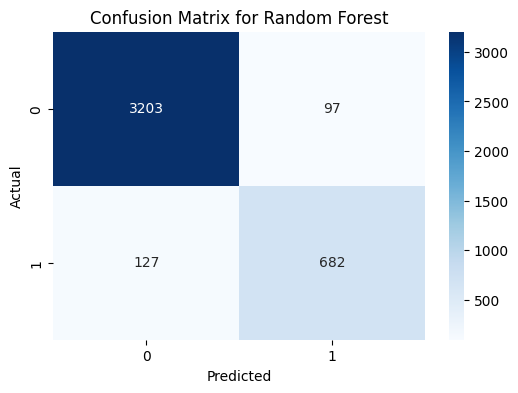

In [26]:
y_pred_rf = rf_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest")

In [27]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

---Support Vector Machine (SVM)---
Accuracy: 0.9428
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      3300
         1.0       0.88      0.82      0.85       809

    accuracy                           0.94      4109
   macro avg       0.92      0.90      0.91      4109
weighted avg       0.94      0.94      0.94      4109



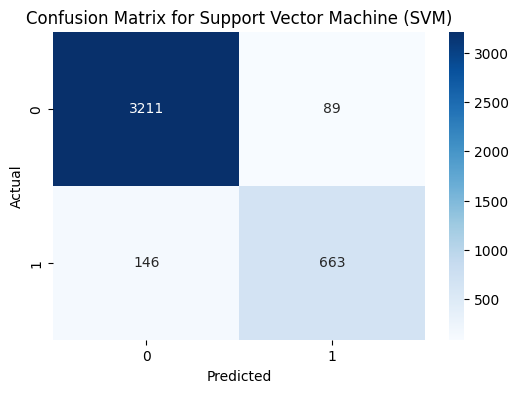

In [28]:
y_pred_svm = svm_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")

In [29]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_logistic),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_svm)]

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

---K-Nearest Neighbors (KNN)---
Accuracy: 0.9377
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      3300
         1.0       0.85      0.83      0.84       809

    accuracy                           0.94      4109
   macro avg       0.90      0.90      0.90      4109
weighted avg       0.94      0.94      0.94      4109



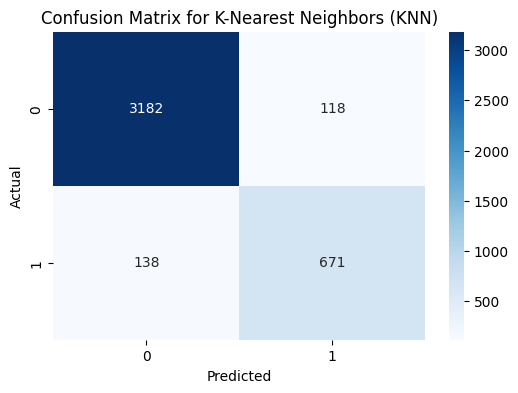

In [31]:
y_pred_knn = knn_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")

In [32]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracies = [accuracy_score(y_test, y_pred_logistic),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_knn)]

/var/folders/xj/9lrz6jfx1t9b2f0c2h_4fcl00000gn/T/ipykernel_9554/1771603763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=models, y=accuracies, palette='coolwarm')


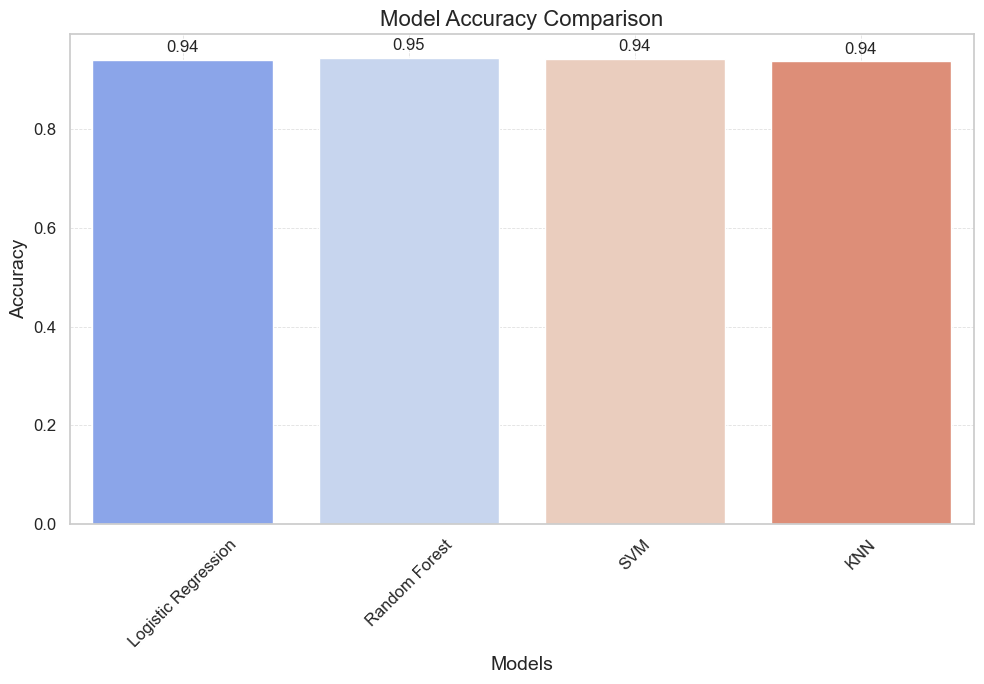

In [33]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
bar = sns.barplot(x=models, y=accuracies, palette='coolwarm')

for p in bar.patches:
    bar.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.01, f'{p.get_height():.2f}', ha="center", va='bottom')

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)
plt.tight_layout()
plt.show()

In [34]:
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [35]:
risk_categories = []
for prob in y_prob_rf:
    if prob > 0.75:
        risk_categories.append('High Risk')
    elif 0.25 < prob <= 0.75:
        risk_categories.append('Medium Risk')
    else:
        risk_categories.append('Low Risk')

In [36]:
X_test_original = X_test.reset_index(drop=True)

original_indices = X_test.index

districts = flood_data_cleaned.loc[X_test.index, 'Station_Names'].reset_index(drop=True)

In [37]:
risk_df = pd.DataFrame({
    'Station_Name': districts,
    'Predicted_Probability': y_prob_rf,
    'Risk_Level': risk_categories
})

In [38]:
print(risk_df)

                  Station_Name  Predicted_Probability Risk_Level
0                      Barisal                   0.00   Low Risk
1                       Hatiya                   0.00   Low Risk
2                      Ishurdi                   0.00   Low Risk
3                       Mongla                   0.04   Low Risk
4                      Comilla                   0.00   Low Risk
...                        ...                    ...        ...
4104                  Satkhira                   0.20   Low Risk
4105  Chittagong (IAP-Patenga)                   0.00   Low Risk
4106                Mymensingh                   0.00   Low Risk
4107                Mymensingh                   0.09   Low Risk
4108                     Dhaka                   0.20   Low Risk

[4109 rows x 3 columns]


/var/folders/xj/9lrz6jfx1t9b2f0c2h_4fcl00000gn/T/ipykernel_9554/1113551379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=risk_df, x='Risk_Level', palette='coolwarm', order=['Low Risk', 'Medium Risk', 'High Risk'])


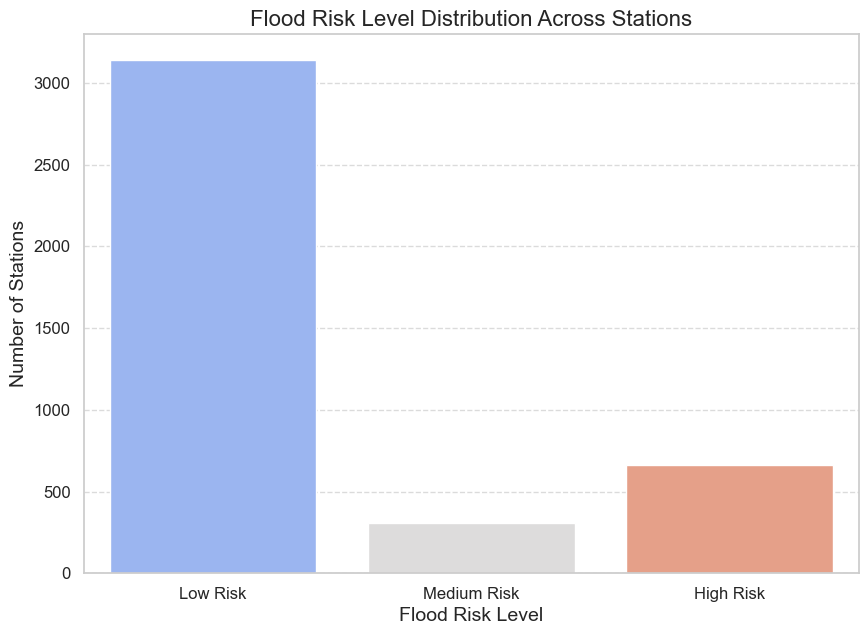

In [39]:
plt.figure(figsize=(10, 7))
sns.countplot(data=risk_df, x='Risk_Level', palette='coolwarm', order=['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Flood Risk Level Distribution Across Stations', fontsize=16)
plt.xlabel('Flood Risk Level', fontsize=14)
plt.ylabel('Number of Stations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

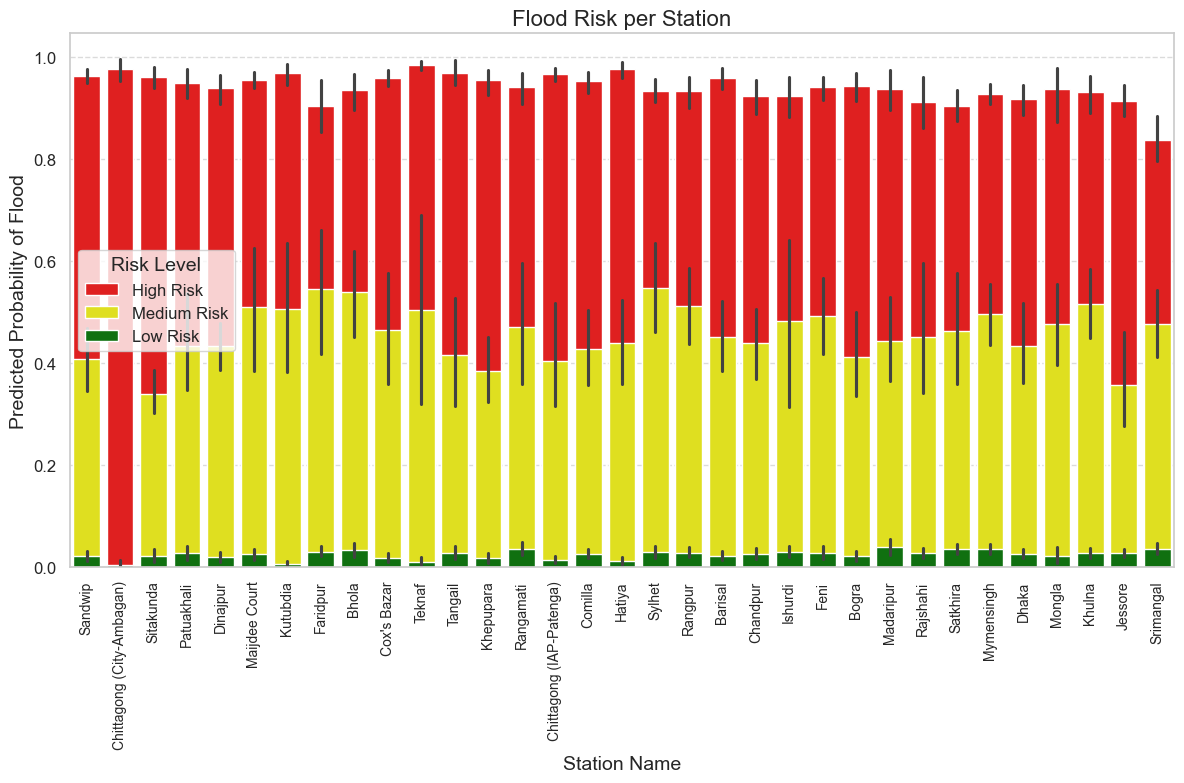

In [40]:
plt.figure(figsize=(12, 8))

palette = {
    'Low Risk': 'green',
    'Medium Risk': 'yellow',
    'High Risk': 'red'
}

sns.barplot(data=risk_df.sort_values('Predicted_Probability', ascending=False),
            x='Station_Name',
            y='Predicted_Probability',
            hue='Risk_Level',
            dodge=False,
            palette=palette)

plt.title('Flood Risk per Station', fontsize=16)
plt.xlabel('Station Name', fontsize=14)
plt.ylabel('Predicted Probability of Flood', fontsize=14)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.legend(title='Risk Level', fontsize=12, title_fontsize=14)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [41]:
X_test_original = X_test.reset_index(drop=True)
districts = flood_data_cleaned['Station_Names'].iloc[X_test.index].reset_index(drop=True)


In [42]:
risk_df = pd.DataFrame({
    'Station_Name': districts,
    'Predicted_Probability': y_prob_rf,
    'Risk_Level': risk_categories,
    'Month': flood_data_cleaned['Month'].iloc[X_test.index].reset_index(drop=True)
})

In [43]:
print(risk_df.head())

  Station_Name  Predicted_Probability Risk_Level  Month
0      Barisal                   0.00   Low Risk      2
1       Hatiya                   0.00   Low Risk      5
2      Ishurdi                   0.00   Low Risk      2
3       Mongla                   0.04   Low Risk     10
4      Comilla                   0.00   Low Risk      1


In [44]:
monthly_station_risk = risk_df.groupby(['Month', 'Station_Name']).agg({'Predicted_Probability': 'mean'}).reset_index()

In [45]:
pivot_risk = monthly_station_risk.pivot(index="Station_Name", columns="Month", values="Predicted_Probability").fillna(0)


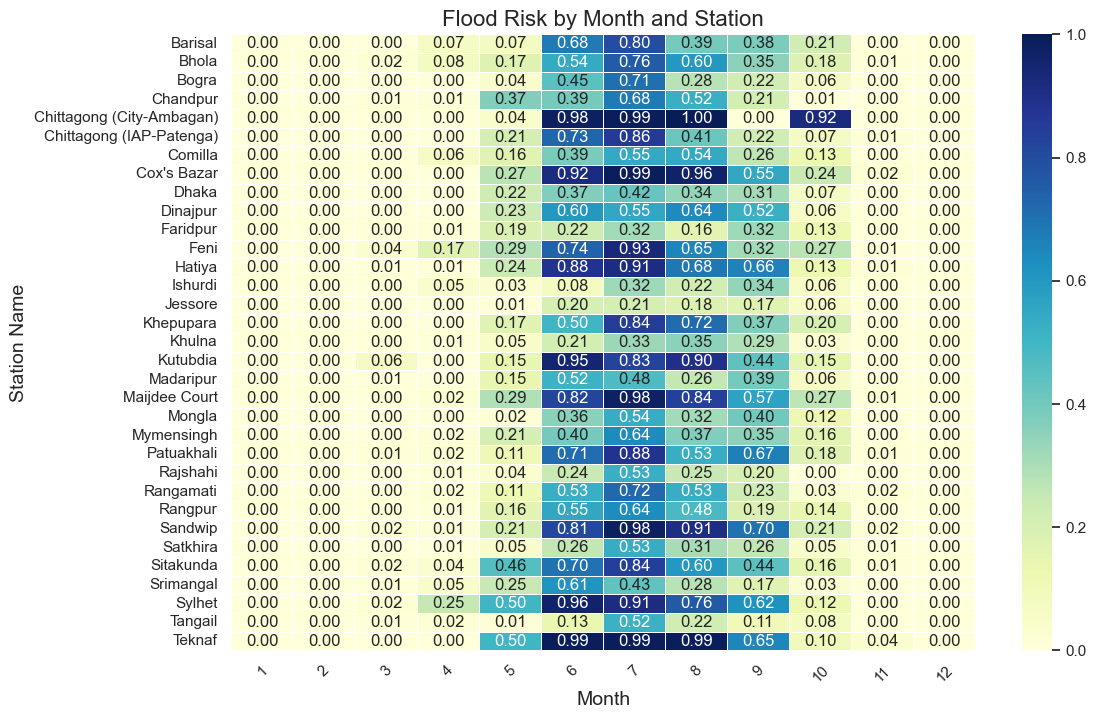

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_risk, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Flood Risk by Month and Station', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Station Name', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Load the data
data = pd.read_csv('FloodPrediction.csv')

# Display the first few rows of the dataset (to verify the loaded data)
print(data.head())

# Define input and output columns
input_features = ['Station_Names', 'Month']  # Input features you want to use for prediction
output_features = ['Max_Temp', 'Min_Temp', 'Rainfall', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine']  # Targets

# Define the preprocessor for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('FloodGuard', OneHotEncoder(handle_unknown='ignore'), input_features)
    ]
)

# Define the model pipeline with preprocessing and regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)))
])

# Split the data into training and testing sets
X = data[input_features]
y = data[output_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Evaluate the model on test data
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error for each output feature:")
for feature, error in zip(output_features, mse):
    print(f"{feature}: {error}")

# Save the entire pipeline
filename = 'rf_model_with_pipeline.sav'
joblib.dump(model_pipeline, filename)  # Save the pipeline with preprocessing and model

print("Model and preprocessing pipeline saved successfully as 'rf_model_with_pipeline.sav'")

   Sl Station_Names  Year  Month  Max_Temp  Min_Temp  Rainfall  \
0   0       Barisal  1949      1      29.4      12.3       0.0   
1   1       Barisal  1949      2      33.9      15.2       9.0   
2   2       Barisal  1949      3      36.7      20.2       8.0   
3   3       Barisal  1949      4      33.9      23.9     140.0   
4   4       Barisal  1949      5      35.6      25.0     217.0   

   Relative_Humidity  Wind_Speed  Cloud_Coverage  Bright_Sunshine  \
0               68.0    0.453704             0.6         7.831915   
1               63.0    0.659259             0.9         8.314894   
2               59.0    1.085185             1.5         8.131915   
3               71.0    1.772222             3.9         8.219149   
4               76.0    1.703704             4.1         7.046809   

   Station_Number     X_COR     Y_COR  LATITUDE  LONGITUDE  ALT   Period  \
0           41950  536809.8  510151.9      22.7      90.36    4  1949.01   
1           41950  536809.8  510151.

In [58]:
print(data.columns)  # This will show you all column names

Index(['Sl', 'Station_Names', 'Year', 'Month', 'Max_Temp', 'Min_Temp',
       'Rainfall', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage',
       'Bright_Sunshine', 'Station_Number', 'X_COR', 'Y_COR', 'LATITUDE',
       'LONGITUDE', 'ALT', 'Period', 'Flood?'],
      dtype='object')


In [48]:
import joblib

# After training your model, save the entire pipeline
filename = 'rf_model2_forFG.sav'
joblib.dump(model, filename)  # Save the entire pipeline

In [ ]:
# Loading a model
# loaded_model = pickle.load(open('rf_model2_forFG.sav', 'rb')) # rb = reading in binary

In [62]:
import pandas as pd
import joblib

# Load the entire pipeline
loaded_model = joblib.load('rf_model2_forFG.sav')

# Define the function to predict weather parameters based on input Station_Names and Month
def predict_weather(loaded_model, station_name, month):
    # Format the input data as a DataFrame with the appropriate column names
    input_data = pd.DataFrame([[station_name, month]], columns=['Station_Names', 'Month'])
    
    # Predict using the loaded pipeline
    prediction = loaded_model.predict(input_data)
    
    # Define output features to match the training output structure
    output_features = ['Max_Temp', 'Min_Temp', 'Rainfall', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine']
    
    # Format prediction output as a dictionary
    output = {feature: prediction[0][i] for i, feature in enumerate(output_features)}
    return output

# Example prediction
station_name = 2  # Replace with an actual station name from your data
month = 3  # Replace with an actual month from your data
predicted_weather = predict_weather(loaded_model, station_name, month)
print(f"Predicted weather for {station_name} in {month}:")
print(predicted_weather)

/Users/SABBIR HOSSAIN/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but RandomForestClassifier is expecting 9 features as input.